# Montamos Unidad de Drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks/TP_Ind4

/content/drive/MyDrive/Colab Notebooks/TP_Ind4


In [ ]:
%cd drive/MyDrive/TP_Ind4

/content/drive/.shortcut-targets-by-id/17FeAVfVLm-bhQ0cBKXS7bsPk0E6kXi_t/TP_Ind4


In [4]:
%ls

 AnalisisExploratorio.ipynb
'best model'/
 data/
 Docs.gdoc
'model tunning'/
'TP 1 - Exploración, visualización de datos y Machine Learning.pdf'


# Paquetes

In [ ]:
!pip install plotly==5.4.0

     |████████████████████████████████| 25.3 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset

In [ ]:
data = pd.read_csv("data/Bank Marketing.csv", sep=';')
data.head()

Age           Job Marital Status  ... Previous Poutcome  Subscription
0   58    management        married  ...        0  unknown             1
1   44    technician         single  ...        0  unknown             1
2   33  entrepreneur        married  ...        0  unknown             1
3   47   blue-collar        married  ...        0  unknown             1
4   33       unknown         single  ...        0  unknown             1

[5 rows x 17 columns]

In [ ]:
# Dimensión del dataset de trabajo.
data.shape

(45211, 17)

In [ ]:
# Vemos los diferentes tipos de variables del dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [ ]:
# Vemos la distribución de las variables numércias.
data.describe().transpose()

count         mean  ...     75%       max
Age                    45211.0    40.936210  ...    48.0      95.0
Balance (euros)        45211.0  1362.272058  ...  1428.0  102127.0
Last Contact Day       45211.0    15.806419  ...    21.0      31.0
Last Contact Duration  45211.0   258.163080  ...   319.0    4918.0
Campaign               45211.0     2.763841  ...     3.0      63.0
Pdays                  45211.0    40.197828  ...    -1.0     871.0
Previous               45211.0     0.580323  ...     0.0     275.0
Subscription           45211.0     0.116985  ...     0.0       1.0

[8 rows x 8 columns]

In [ ]:
# Corregimos las clases de la variable respuesta.
data["Subscription"] = data['Subscription'].map({2:1, 1:0})

In [ ]:
# Vemos la distribución de las clases de la variable respuesta.
data["Subscription"].value_counts()

0    39922
1     5289
Name: Subscription, dtype: int64

# Preguntas (punto 1)

In [ ]:
# Cantidad de filas y columnas.
data.shape

(45211, 17)

In [ ]:
# Variables numéricas y categóricas. Valores vacíos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [ ]:
# No hay NAs pero hay info faltante -> unknown en categóricas.
data["Contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: Contact, dtype: int64

Podemos ver que algunas variables categóricas tienen la categoría *unknown* indicando que no tenemos disponible esa información.
* En las variables **Job** y **Education** las frecuencias no parecen tener tanta incidencia.
* En la variable **Contact** tenemos un tercio de las observaciones con información faltante.
* La variable **Poutcome** (el resultado de la campaña anterior) tiene un 80% de observaciones faltantes. Esto se da porque la mayoría de los clientes analizados no participaron de campañas anteriores. 

Esta última variable contiene información relevante y debemos pensar cómo incluirla en el modelo.

In [ ]:
(data == "unknown").sum()

Age                          0
Job                        288
Marital Status               0
Education                 1857
Credit                       0
Balance (euros)              0
Housing Loan                 0
Personal Loan                0
Contact                  13020
Last Contact Day             0
Last Contact Month           0
Last Contact Duration        0
Campaign                     0
Pdays                        0
Previous                     0
Poutcome                 36959
Subscription                 0
dtype: int64

La variable **Pdays** tiene una gran cantidad de valores faltantes porque se corresponde con las observaciones que no participaron de campañas anteriores.

In [ ]:
(data == -1).sum()

Age                          0
Job                          0
Marital Status               0
Education                    0
Credit                       0
Balance (euros)             50
Housing Loan                 0
Personal Loan                0
Contact                      0
Last Contact Day             0
Last Contact Month           0
Last Contact Duration        0
Campaign                     0
Pdays                    36954
Previous                     0
Poutcome                     0
Subscription                 0
dtype: int64

In [ ]:
# Estado civil.
data["Marital Status"].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: Marital Status, dtype: float64

In [ ]:
# Educación.
data["Education"].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: Education, dtype: float64

In [ ]:
# Suscripcion al plazo fijo.
data["Subscription"].value_counts(normalize=True)

1    0.883015
2    0.116985
Name: Subscription, dtype: float64

# Funciones para plotear

In [ ]:
def plotCont(variable, log = False):
  if log == False:
    print((data[variable]).describe())
  else:
    print(np.log(data[variable]).describe())

  plot1 = px.histogram(data_frame=data, x=variable, title=variable, log_x=log)
  plot1.update_layout(width=1000,
                      height=500)
  plot1.show()

  plot2 = px.box(data_frame=data, x = "Subscription", y = variable, log_y=log)
  plot2.update_layout(width=1000,
                      height=500)
  plot2.show()

def plotCat(variable, prop = True):
  table1 = data[variable].value_counts(normalize = prop)
  print(table1)

  display(pd.crosstab(index = data["Subscription"], 
                        columns = data[variable]))


  if prop:
    display(pd.crosstab(index = data["Subscription"], 
                        columns = data[variable], 
                        normalize = 'columns')) #if prop == True else False))
    


  plot1 = sns.barplot(x=table1.index, y = table1.values)
  plt.show()

  #plot2 = px.bar(data_frame=table2, x = "Subscription", y = variable, log_y=log)
  #plot2.show()

  #plt.bar()
  #plot2 = px.box(data_frame=data, x = "Subscription", y = variable, log_y=log)
  #plot2.show()
  
  

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: Education, dtype: float64


Education     primary  secondary  tertiary  unknown
Subscription                                       
1                6260      20752     11305     1605
2                 591       2450      1996      252

Education      primary  secondary  tertiary   unknown
Subscription                                         
1             0.913735   0.894406  0.849936  0.864297
2             0.086265   0.105594  0.150064  0.135703

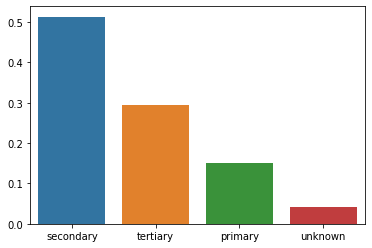

In [ ]:
plotCat("Education")

In [ ]:
display(pd.crosstab(index = data["Subscription"], 
                    columns = data["Education"],
                    normalize='columns'))

Education      primary  secondary  tertiary   unknown
Subscription                                         
1             0.913735   0.894406  0.849936  0.864297
2             0.086265   0.105594  0.150064  0.135703

In [ ]:
plt.hist(data["Age"], bins=25)

(array([1.760e+02, 6.330e+02, 2.241e+03, 3.980e+03, 6.053e+03, 5.630e+03,
        4.649e+03, 3.888e+03, 3.513e+03, 3.260e+03, 2.869e+03, 2.613e+03,
        3.152e+03, 1.513e+03, 2.310e+02, 1.760e+02, 1.470e+02, 1.500e+02,
        1.080e+02, 9.900e+01, 6.700e+01, 3.600e+01, 1.500e+01, 5.000e+00,
        7.000e+00]),
 array([18.  , 21.08, 24.16, 27.24, 30.32, 33.4 , 36.48, 39.56, 42.64,
        45.72, 48.8 , 51.88, 54.96, 58.04, 61.12, 64.2 , 67.28, 70.36,
        73.44, 76.52, 79.6 , 82.68, 85.76, 88.84, 91.92, 95.  ]),
 <a list of 25 Patch objects>)

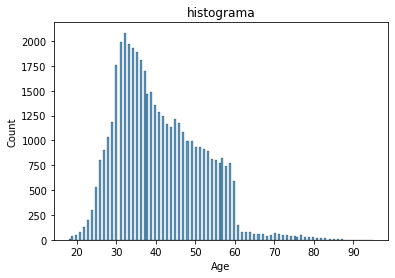

In [ ]:
*sns.histplot(data=data, x="Age", bins = 150)
plt.title("histograma")
plt.show()

In [ ]:
sns.boxplot(data=data, x = "Subscription", y="Age")

In [ ]:
plotCat("Poutcome", prop = True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: Poutcome, dtype: float64


Poutcome       failure     other   success   unknown
Subscription                                        
0             0.873903  0.833152  0.352747  0.908385
1             0.126097  0.166848  0.647253  0.091615

# Analisis y visualizacion de variables


## Age

Edad de la persona.

* A partir de 60 años hay un cambio en la distribución.
* No parece haber grandes diferencias con la variable respuesta.
* Vemos que hay una diferencia en la proporción de la variable respuesta cuando la edad es >60 años.




In [ ]:
plotCont('Age', log=False) 

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64


Podemos ver la diferencia de proporciones entre los jubilados que invierten en el plazo fijo después de la campaña contra los no jubilados.

In [ ]:
jubilados = pd.cut(data["Age"], [0,60,100], labels=['Mayor60', 'Menor60'])
pd.crosstab(index=data["Subscription"], columns=jubilados, normalize='columns')

Age           no jubilado  jubilado
Subscription                       
0                0.891261  0.577441
1                0.108739  0.422559

Los resultados de las proporciones anteriores se da por el corte abrupto que tiene la variable Edad.

In [ ]:
px.histogram(data_frame=data,
             x="Age",
             color="Subscription").update_layout(barmode="group",
                                                 barnorm="",
                                                 width=1000,
                                                 height=500).show()

px.histogram(data_frame=data,
             x="Age",
             color="Subscription").update_layout(barmode="relative",
                                                 barnorm="percent",
                                                 width=1000,
                                                 height=500).show()

## Job

Empleo de la persona.

* Agrupamos las categorías con frecuencia menor a 5 % en *otros*.


In [ ]:
data["Job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

In [ ]:
plotCat('Job', prop=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: Job, dtype: float64


Job             admin.  blue-collar  ...  unemployed   unknown
Subscription                         ...                      
0             0.877973      0.92725  ...    0.844973  0.881944
1             0.122027      0.07275  ...    0.155027  0.118056

[2 rows x 12 columns]

In [ ]:
pd.crosstab(index=data["Age"]<=20, columns=data["Job"])

Job    admin.  blue-collar  entrepreneur  ...  technician  unemployed  unknown
Age                                       ...                                 
False    5169         9728          1487  ...        7597        1303      288
True        2            4             0  ...           0           0        0

[2 rows x 12 columns]

In [ ]:
pd.crosstab(columns=data["Job"], index=jubilados)

Job          admin.  blue-collar  entrepreneur  ...  technician  unemployed  unknown
Age                                             ...                                 
no jubilado    5146         9706          1474  ...        7567        1293      266
jubilado         25           26            13  ...          30          10       22

[2 rows x 12 columns]

In [ ]:
trabajo_frec = data["Job"].value_counts(normalize=True)
trabajos_otros = list(trabajo_frec.index[(trabajo_frec<0.05).values])
print(trabajos_otros)

['self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']


In [ ]:
data["Job"] = data["Job"].mask(data["Job"].isin(trabajos_otros), "others")
data["Job"]

0         management
1         technician
2             others
3        blue-collar
4             others
            ...     
45206     technician
45207        retired
45208        retired
45209    blue-collar
45210         others
Name: Job, Length: 45211, dtype: object

## Marital Status

Estados Civil.

* No parece haber grandes diferencias entre las distintas clases.

married     0.601933
single      0.282896
divorced    0.115171
Name: Marital Status, dtype: float64


Marital Status  divorced  married  single
Subscription                             
0                   4585    24459   10878
1                    622     2755    1912

Marital Status  divorced   married    single
Subscription                                
0               0.880545  0.898765  0.850508
1               0.119455  0.101235  0.149492

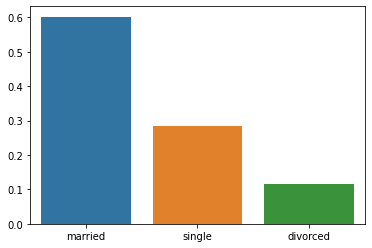

In [ ]:
plotCat('Marital Status')

## Education

Educación de la persona.

* Tenemos algunas observaciones de las que no tenemos información pero resultan menos del 5% del set. 

* Vemos una tendencia a mayor nivel educativo, mayor aceptación del plazo fijo.

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: Education, dtype: float64


Education     primary  secondary  tertiary  unknown
Subscription                                       
0                6260      20752     11305     1605
1                 591       2450      1996      252

Education      primary  secondary  tertiary   unknown
Subscription                                         
0             0.913735   0.894406  0.849936  0.864297
1             0.086265   0.105594  0.150064  0.135703

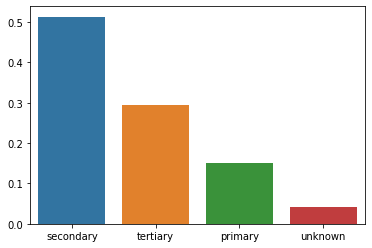

In [ ]:
plotCat('Education')

## Credit

Variable binaria si tiene crédito en default o sin pagar.

* Tiene categoría con muy baja frecuencia.

no     0.981973
yes    0.018027
Name: Credit, dtype: float64


Credit           no  yes
Subscription            
0             39159  763
1              5237   52

Credit              no       yes
Subscription                    
0             0.882039  0.936196
1             0.117961  0.063804

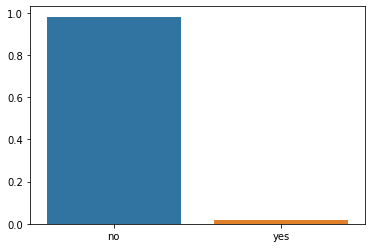

In [ ]:
plotCat('Credit')

## Balance (euros)

In [ ]:
plotCont('Balance (euros)')

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Balance (euros), dtype: float64


In [ ]:
balance_quantile = data["Balance (euros)"].quantile(np.arange(0,1.1,0.1))
print(balance_quantile)

labels_quantile = []
for quantile in np.arange(0.1,1.1,0.1):
  quantile = round(quantile, 2)
  labels_quantile.append(f"qt {quantile}")

print(labels_quantile)

0.0     -8019.0
0.1         0.0
0.2        22.0
0.3       131.0
0.4       272.0
0.5       448.0
0.6       701.0
0.7      1126.0
0.8      1859.0
0.9      3574.0
1.0    102127.0
Name: Balance (euros), dtype: float64
['qt 0.1', 'qt 0.2', 'qt 0.3', 'qt 0.4', 'qt 0.5', 'qt 0.6', 'qt 0.7', 'qt 0.8', 'qt 0.9', 'qt 1.0']


In [ ]:
data["Balance_qt"] = pd.cut(data["Balance (euros)"], 
                            bins=balance_quantile,
                            labels=labels_quantile)
data["Balance_qt"]

0        qt 0.9
1        qt 0.3
2        qt 0.2
3        qt 0.8
4        qt 0.2
          ...  
45206    qt 0.7
45207    qt 0.8
45208    qt 1.0
45209    qt 0.6
45210    qt 0.9
Name: Balance_qt, Length: 45211, dtype: category
Categories (10, object): ['qt 0.1' < 'qt 0.2' < 'qt 0.3' < 'qt 0.4' ... 'qt 0.7' < 'qt 0.8' < 'qt 0.9' <
                          'qt 1.0']

Podemos ver cómo a medida que subimos en el cuantil del balance tenemos un aumento en la proporción de éxito en la campaña. Las personas con menor balance tienen a acceder menos al plazo fijo.

In [ ]:
display(pd.crosstab(index=data["Subscription"], 
            columns=data["Balance_qt"],
            normalize="columns"))

display(pd.crosstab(index=data["Subscription"], 
            columns=data["Balance_qt"]))

Balance_qt      qt 0.1    qt 0.2    qt 0.3  ...    qt 0.8    qt 0.9    qt 1.0
Subscription                                ...                              
0             0.931034  0.927806  0.908231  ...  0.857523  0.833886  0.838752
1             0.068966  0.072194  0.091769  ...  0.142477  0.166114  0.161248

[2 rows x 10 columns]

Balance_qt    qt 0.1  qt 0.2  qt 0.3  qt 0.4  ...  qt 0.7  qt 0.8  qt 0.9  qt 1.0
Subscription                                  ...                                
0               6777    1645    4127    4027  ...    3952    3870    3770    3792
1                502     128     417     489  ...     574     643     751     729

[2 rows x 10 columns]

In [ ]:
data.groupby("Balance_qt").agg({"Balance (euros)":['mean', 'min', 'max']})

Balance (euros)              
                      mean   min     max
Balance_qt                              
qt 0.1         -163.258002 -6847       0
qt 0.2            9.003948     1      22
qt 0.3           73.776849    23     131
qt 0.4          199.815766   132     272
qt 0.5          354.834483   273     448
qt 0.6          567.694825   449     701
qt 0.7          894.627928   702    1126
qt 0.8         1454.024152  1127    1859
qt 0.9         2592.906879  1860    3574
qt 1.0         7749.780137  3575  102127

La ventaja de la partición con cuantiles es que quedan grupos de igual tamaño. La desventaja es que los últimos cuantiles cubren un gran espacio de balances donde hay partes heterogéneas.

* Las personas con más de 50k no piden plazos fijos, pero son una cantidad muy baja de observaciones.

In [ ]:
(data["Balance (euros)"] > 50000).value_counts()

False    45193
True        18
Name: Balance (euros), dtype: int64

In [ ]:
px.histogram(data_frame=data,
             x="Balance (euros)",
             color="Subscription",
             nbins=50).update_layout(barnorm='percent')

Otra forma de modelar esta variable es separar los valores negativos de los positivos. En este caso tendríamos una variable que representa el balance negativo y otra que representa el balance positivo.

Cuando separamos las distribuciones podemos trabajar con la transformación logarítmica.

Otra opción es pasar la del balance negativo y/o 0 a una variable categórica.

In [ ]:
data["Balance_neg"] = (data["Balance (euros)"].
                       where(data["Balance (euros)"]<0, 0.01).
                       mask(data["Balance (euros)"]<0, -data["Balance (euros)"]))

data["Balance_pos"] = (data["Balance (euros)"].
                       mask(data["Balance (euros)"]<=0, 0.01))

data["Balance_neg_cat"] = data["Balance (euros)"] < 0

In [ ]:
display(px.histogram(data_frame=data,
             x=np.log10(data["Balance_pos"]),
             color="Subscription").update_layout(barmode='group'))

display(px.histogram(data_frame=data,
             x=np.log10(data["Balance_pos"]),
             color="Subscription").update_layout(barnorm='percent'))

In [ ]:
display(px.histogram(data_frame=data,
             x=np.log10(data["Balance_neg"]),
             color="Subscription").update_layout(barmode='group'))

display(px.histogram(data_frame=data,
             x=np.log10(data["Balance_neg"]),
             color="Subscription").update_layout(barnorm='percent'))

In [ ]:
data["Balance_neg_cat"].value_counts()

False    41445
True      3766
Name: Balance_neg_cat, dtype: int64

## Housing Loan

Variable que indica si tenes un préstamo de vivienda (hipoteca).

* Vemos una diferencia significativa entre las categorías de esta variable contra la respuesta.

yes    0.555838
no     0.444162
Name: Housing Loan, dtype: float64


Housing Loan     no    yes
Subscription              
0             16727  23195
1              3354   1935

Housing Loan        no    yes
Subscription                 
0             0.832976  0.923
1             0.167024  0.077

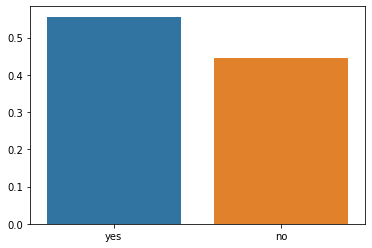

In [ ]:
plotCat('Housing Loan')

## Personal Loan

Variable que indica si la persona tiene un préstamo personal.

* Distribución similar a la anterior.

no     0.839774
yes    0.160226
Name: Personal Loan, dtype: float64


Personal Loan     no   yes
Subscription              
0              33162  6760
1               4805   484

Personal Loan        no       yes
Subscription                     
0              0.873443  0.933186
1              0.126557  0.066814

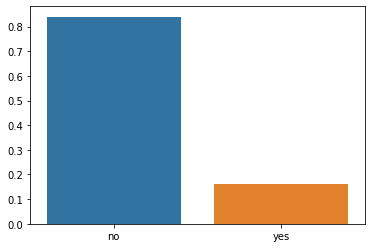

In [ ]:
plotCat('Personal Loan')

## Contact

Tipo de contacto vinculado a la **última** comunicación en la campaña **actual**.

* Hay una clara diferencia en la categoría **unknown** pero no está clara la interpretación de ese valor faltante.

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: Contact, dtype: float64


Contact       cellular  telephone  unknown
Subscription                              
0                24916       2516    12490
1                 4369        390      530

Contact       cellular  telephone   unknown
Subscription                               
0             0.850811   0.865795  0.959293
1             0.149189   0.134205  0.040707

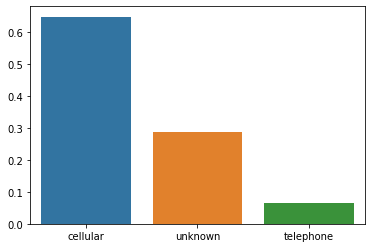

In [ ]:
plotCat('Contact')

Vemos que prácticamente todas las observaciones tienen duración de último contacto, por lo que hubo un contacto pero no se conoce por qué vía se dio. 

No sabemos si incluye casos de las otras categorías que no fueron registradas.

In [ ]:
pd.crosstab(index=data["Last Contact Duration"]==0, columns=data["Contact"] == 'unknown')

Contact                False  True 
Last Contact Duration              
False                  32189  13019
True                       2      1

## Last Contact Day

Último día de contacto en la campaña **actual** para el mes indicado.

In [ ]:
plotCont('Last Contact Day')

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: Last Contact Day, dtype: float64


In [ ]:
px.histogram(data_frame=data,
             x="Last Contact Day",
             color = "Subscription").update_layout(barnorm="percent",
                                                   width=1000,
                                                   height=500)

Podemos ver si hay influencia de la semana del mes de contacto. Vemos una menor efectividad en la tercera semana del mes.

In [ ]:
last_contact_day_cut = pd.cut(data["Last Contact Day"], bins=[0, 7, 14, 21, 31])
pd.crosstab(index = data["Subscription"],
            columns = last_contact_day_cut, normalize='columns')

Last Contact Day    (0, 7]   (7, 14]  (14, 21]  (21, 31]
Subscription                                            
0                 0.874158  0.868129   0.90295  0.879866
1                 0.125842  0.131871   0.09705  0.120134

In [ ]:
data["Last Contact Day_cat"] = pd.cut(data["Last Contact Day"], bins=[0, 7, 14, 21, 31])

## Last Contact Month

Mes del último contacto en la campaña **actual**.

* Los meses de menor frecuencia tienen una distribución de la variable respuesta muy diferente.

* Se podría agrupar las últimas frecuencias en una categoría *otros*.

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: Last Contact Month, dtype: float64


Last Contact Month   apr   aug  dec   feb   jan  ...  mar    may   nov  oct  sep
Subscription                                     ...                            
0                   2355  5559  114  2208  1261  ...  229  12841  3567  415  310
1                    577   688  100   441   142  ...  248    925   403  323  269

[2 rows x 12 columns]

Last Contact Month       apr       aug      dec  ...       nov       oct       sep
Subscription                                     ...                              
0                   0.803206  0.889867  0.53271  ...  0.898489  0.562331  0.535406
1                   0.196794  0.110133  0.46729  ...  0.101511  0.437669  0.464594

[2 rows x 12 columns]

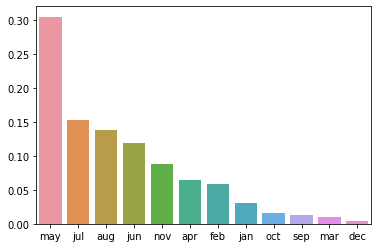

In [ ]:
plotCat('Last Contact Month')

Agrupamos los meses de menor frecuencia en la categoría otros.

In [ ]:
other_months = ["oct", "sep", "mar", "dec"]
data["Last Contact Month"] = data["Last Contact Month"].mask(data["Last Contact Month"].isin(other_months), 'other')

may      0.304483
jul      0.152507
aug      0.138174
jun      0.118135
nov      0.087810
apr      0.064851
feb      0.058592
other    0.044414
jan      0.031032
Name: Last Contact Month, dtype: float64


Last Contact Month   apr   aug   feb   jan   jul   jun    may   nov  other
Subscription                                                              
0                   2355  5559  2208  1261  6268  4795  12841  3567   1068
1                    577   688   441   142   627   546    925   403    940

Last Contact Month       apr       aug       feb  ...       may       nov     other
Subscription                                      ...                              
0                   0.803206  0.889867  0.833522  ...  0.932805  0.898489  0.531873
1                   0.196794  0.110133  0.166478  ...  0.067195  0.101511  0.468127

[2 rows x 9 columns]

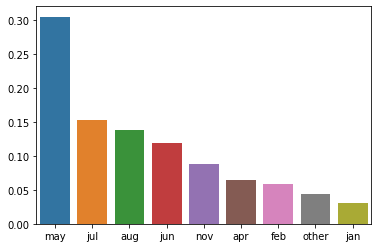

In [ ]:
plotCat('Last Contact Month')

## Last Contact Duration

Duración del último contacto en la campaña **actual**.

* Vemos un cambio en la distribución para los casos donde hubo suscripción. 

A mayor duración del último contacto claramente vemos un aumento en la proporción de éxito en la campaña.

In [ ]:
plotCont('Last Contact Duration')

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



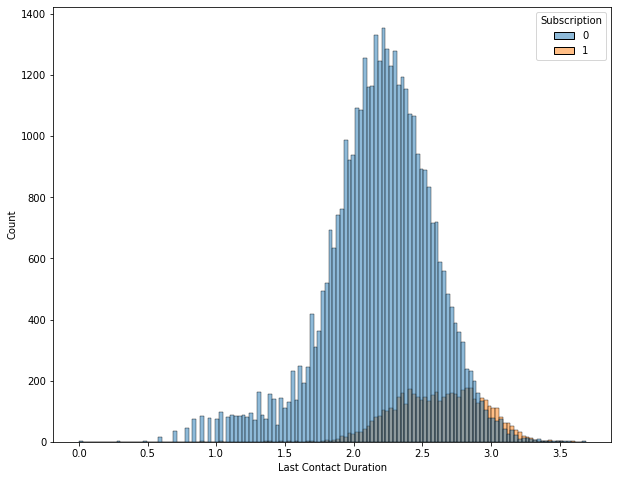

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x=np.log10(data["Last Contact Duration"]), hue = data["Subscription"])
plt.show()

In [ ]:
px.histogram(x=np.log10(data["Last Contact Duration"]), 
             color=data["Subscription"]).update_layout(barmode="group").show()

px.histogram(x=np.log10(data["Last Contact Duration"]), 
             color=data["Subscription"]).update_layout(barnorm="percent").show()      

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



## Campaign

Número de contactos en la campaña **actual** para ese cliente. 

* Vemos que a mayor cantidad de contactos menor proporción de éxito en la campaña.

In [ ]:
plotCont('Campaign', log=False)

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: Campaign, dtype: float64


In [ ]:
px.histogram(data_frame=data,
             x="Campaign",
             color="Subscription",
             log_x=True).update_layout(barnorm='percent')

## Pdays

In [ ]:
plotCont('Pdays')

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: Pdays, dtype: float64


## Previous

In [ ]:
plotCont('Previous')

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: Previous, dtype: float64


## Poutcome

In [ ]:
pd.crosstab(index=data["Poutcome"]=='unknown',
            columns=data["Subscription"],
            normalize="index")

Subscription         0         1
Poutcome                        
False         0.769389  0.230611
True          0.908385  0.091615

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: Poutcome, dtype: float64


Poutcome      failure  other  success  unknown
Subscription                                  
0                4283   1533      533    33573
1                 618    307      978     3386

Poutcome       failure     other   success   unknown
Subscription                                        
0             0.873903  0.833152  0.352747  0.908385
1             0.126097  0.166848  0.647253  0.091615

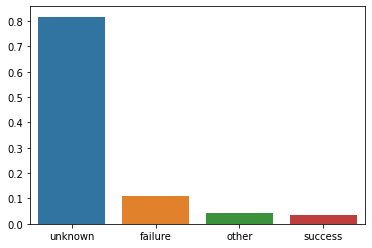

In [ ]:
plotCat('Poutcome')

## Subscription

0    0.883015
1    0.116985
Name: Subscription, dtype: float64


Subscription      0     1
Subscription             
0             39922     0
1                 0  5289

Subscription    0    1
Subscription          
0             1.0  0.0
1             0.0  1.0

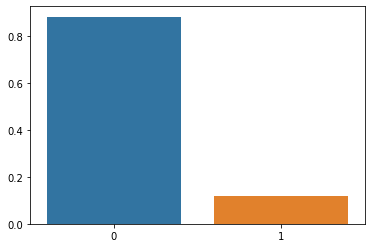

In [ ]:
plotCat("Subscription")

## Más Gráficos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [ ]:
x = None
x==None

True

In [ ]:
def plotScatter(continua, categorica=None):
  columnas = data.columns
  data["Subscription"] = data["Subscription"].astype("category")

  for columna in columnas:

    if data[columna].dtype in ["int64", 'float64']:
      
      if categorica == None:
        plot=px.scatter(data_frame=data,
              x=continua,
              y=columna,
              opacity=0.2
              ).update_layout(template="plotly_white")
      else:
        plot=px.scatter(data_frame=data,
              x=continua,
              y=columna,
              color=categorica,
              opacity=0.2
              ).update_layout(template="plotly_white")

      plot.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    45211 non-null  int64   
 1   Job                    45211 non-null  object  
 2   Marital Status         45211 non-null  object  
 3   Education              45211 non-null  object  
 4   Credit                 45211 non-null  object  
 5   Balance (euros)        45211 non-null  int64   
 6   Housing Loan           45211 non-null  object  
 7   Personal Loan          45211 non-null  object  
 8   Contact                45211 non-null  object  
 9   Last Contact Day       45211 non-null  int64   
 10  Last Contact Month     45211 non-null  object  
 11  Last Contact Duration  45211 non-null  int64   
 12  Campaign               45211 non-null  int64   
 13  Pdays                  45211 non-null  int64   
 14  Previous               45211 non-null 

In [ ]:
plotScatter("Last Contact Day", "Last Contact Month")

Output hidden; open in https://colab.research.google.com to view.

Separamos algunos gráficos interesantes del análisis previo.

A mayor duración del último contacto y a menor número de contactos en la campaña parece más probable la suscripción del cliente.

In [ ]:
px.scatter(data_frame=data,
           x = "Last Contact Duration",
           y = "Campaign",
           color="Subscription",
           opacity = 0.2)

In [ ]:
def catHeatmap(cat1, cat2, prop = False, ticks = None, labels = None):
  tab = pd.crosstab(index=cat1,
                    columns=cat2,
                    values = data["Subscription"],
                    aggfunc = 'mean',
                    normalize=prop)
  
  if ticks == None:
    plot = px.imshow(tab)
  elif ticks == True:
    plot = px.imshow(tab,
                     x=tab.columns,
                     y=tab.index,
                     labels=labels) 
  else:
    plot = px.imshow(tab,
                     x=ticks['x'],
                     y=ticks['y'],
                     labels=labels)    

  plot.show()
  return tab


CategoricalIndex([(0, 7], (7, 14], (14, 21], (21, 31]], categories=[(0, 7], (7, 14], (14, 21], (21, 31]], ordered=True, name='Last Contact Day_cat', dtype='category')

Podemos ver un heatmap para entender la relación de la proporción de la variable respuesta (color) según la semana y el mes del último contacto.

In [ ]:
tab = pd.crosstab(index=data["Last Contact Day_cat"],
            columns=data["Last Contact Month"],
                    values = data["Subscription"],
                    aggfunc = 'mean')
tab.columns

Index(['apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'may', 'nov', 'other'], dtype='object', name='Last Contact Month')

In [ ]:
catHeatmap(data["Last Contact Day_cat"],
           data["Last Contact Month"],
           ticks={'x':list(tab.columns),
                  'y':["Sem1", "Sem2", "Sem3", "Sem4"]},
           labels={'x':"Mes",
                   'y':"Semana"})

Last Contact Month         apr       aug  ...       nov     other
Last Contact Day_cat                      ...                    
(0, 7]                0.170659  0.168654  ...  0.353535  0.402299
(7, 14]               0.241026  0.139864  ...  0.551220  0.468880
(14, 21]              0.105988  0.091478  ...  0.065596  0.484848
(21, 31]              0.462825  0.056233  ...  0.339623  0.514783

[4 rows x 9 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    45211 non-null  int64   
 1   Job                    45211 non-null  object  
 2   Marital Status         45211 non-null  object  
 3   Education              45211 non-null  object  
 4   Credit                 45211 non-null  object  
 5   Balance (euros)        45211 non-null  int64   
 6   Housing Loan           45211 non-null  object  
 7   Personal Loan          45211 non-null  object  
 8   Contact                45211 non-null  object  
 9   Last Contact Day       45211 non-null  int64   
 10  Last Contact Month     45211 non-null  object  
 11  Last Contact Duration  45211 non-null  int64   
 12  Campaign               45211 non-null  int64   
 13  Pdays                  45211 non-null  int64   
 14  Previous               45211 non-null 

In [ ]:
catHeatmap(data["Personal Loan"],
           data["Housing Loan"],
           prop=False,
           ticks=True,
           labels={'x':"Mes",
                   'y':"Semana"})

Housing Loan         no       yes
Personal Loan                    
no             0.182225  0.080432
yes            0.076121  0.060682

In [ ]:
catHeatmap(data["Education"],
           data["Marital Status"],
           prop=False,
           ticks=True,
           labels={'x':'Marital Status',
                   'y':'Education'})

Marital Status  divorced   married    single
Education                                   
primary         0.138298  0.075486  0.106682
secondary       0.103375  0.094699  0.129213
tertiary        0.138001  0.129724  0.183639
unknown         0.142012  0.122414  0.162879

In [ ]:
catHeatmap(data["Education"],
           data["Job"],
           prop=False,
           ticks=True,
           labels={'x':'Job',
                   'y':'Education'})

Job          admin.  blue-collar  management  ...   retired  services  technician
Education                                     ...                                
primary    0.057416     0.058010    0.074830  ...  0.223899  0.084058    0.082278
secondary  0.118986     0.080618    0.086530  ...  0.210366  0.085623    0.099063
tertiary   0.173077     0.161074    0.145366  ...  0.275956  0.123762    0.145325
unknown    0.105263     0.072687    0.198347  ...  0.252101  0.126667    0.095041

[4 rows x 7 columns]

In [ ]:
catHeatmap(data["Job"],
           data["Marital Status"],
           prop=False,
           ticks=True,
           labels={'x':'Marital Status',
                   'y':'Job'})

Marital Status  divorced   married    single
Job                                         
admin.          0.120000  0.113628  0.135995
blue-collar     0.077333  0.062715  0.105760
management      0.127813  0.126111  0.162199
others          0.120516  0.089579  0.222989
retired         0.284706  0.220682  0.120370
services        0.091075  0.073951  0.117696
technician      0.083243  0.102665  0.132443

In [ ]:
px.imshow(data.corr())

# Preparación del Dataset

Volvemos a importar el dataset y aplicamos las siguientes transformaciones:

* Construcción, transformacions y modificaciones de variables previamente realizadas.

* Creación de variables dummy para las categóricas.

* Partición del set de datos en train,  y test.

In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [29]:
data_model = pd.read_csv("data/Bank Marketing.csv", sep=';')

In [30]:
# Corregimos las clases de la variable respuesta.
data_model["Subscription"] = data_model['Subscription'].map({2:1, 1:0})

In [31]:
# Creamos una variable dummy para mayores de 60 años.
data_model["Age_60"] = data_model["Age"] > 60

# Agrupamos trabajos menos frecuentes en una categoría "otros"
trabajo_frec = data_model["Job"].value_counts(normalize=True)
trabajos_otros = list(trabajo_frec.index[(trabajo_frec<0.05).values])
data_model["Job"] = data_model["Job"].mask(data_model["Job"].isin(trabajos_otros), "others")

# Eliminamos la variable Credit por tener muy baja frecuencia.
data_model.drop("Credit",axis=1, inplace=True)

# Dividimos la variable de balance en negativa como categórica y la transformación logarítmica en caso de que el balance sea positivo.
data_model["Balance_neg_cat"] = data_model["Balance (euros)"] < 0
data_model["Balance_pos_log"] = np.log10(data_model["Balance (euros)"].mask(data_model["Balance (euros)"]<=0, 0.01))
data_model.drop("Balance (euros)", axis=1, inplace=True)


# 
data_model.drop("Contact", axis = 1, inplace = True)

data_model["Last Contact Day Cat"] = pd.cut(data_model["Last Contact Day"], bins=[0, 7, 14, 21, 31])
data_model.drop("Last Contact Day", axis =1, inplace=True)

other_months = ["oct", "sep", "mar", "dec"]
data_model["Last Contact Month"] = data_model["Last Contact Month"].mask(data_model["Last Contact Month"].isin(other_months), 'other')

data_model["Last Contact Duration Log"] = np.log10(data_model["Last Contact Duration"]+0.01)
data_model.drop("Last Contact Duration", axis = 1, inplace = True)

data_model["Campaign Log"] = np.log10(data_model["Campaign"]+0.01)
data_model.drop("Campaign", axis = 1, inplace = True)

#
#data_model.drop(["Pdays", "Previous", "Poutcome"], axis=1, inplace=True)

In [32]:
(data_model=='unknown').sum()

Age                              0
Job                              0
Marital Status                   0
Education                     1857
Housing Loan                     0
Personal Loan                    0
Last Contact Month               0
Pdays                            0
Previous                         0
Poutcome                     36959
Subscription                     0
Age_60                           0
Balance_neg_cat                  0
Balance_pos_log                  0
Last Contact Day Cat             0
Last Contact Duration Log        0
Campaign Log                     0
dtype: int64

In [33]:
imp = SimpleImputer(missing_values='unknown',
                    strategy='most_frequent')

In [34]:
data_model["Education"] = imp.fit_transform(data_model["Education"].values.reshape(-1,1)).ravel()

In [35]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        45211 non-null  int64   
 1   Job                        45211 non-null  object  
 2   Marital Status             45211 non-null  object  
 3   Education                  45211 non-null  object  
 4   Housing Loan               45211 non-null  object  
 5   Personal Loan              45211 non-null  object  
 6   Last Contact Month         45211 non-null  object  
 7   Pdays                      45211 non-null  int64   
 8   Previous                   45211 non-null  int64   
 9   Poutcome                   45211 non-null  object  
 10  Subscription               45211 non-null  int64   
 11  Age_60                     45211 non-null  bool    
 12  Balance_neg_cat            45211 non-null  bool    
 13  Balance_pos_log            4521

In [36]:
cat_vars = ["Job", "Marital Status", "Education", "Last Contact Month", "Last Contact Day Cat"]

for var in cat_vars:
  data_model = pd.concat([data_model, pd.get_dummies(data_model[var], prefix=var)], axis=1)
  data_model.drop(var, axis=1, inplace=True)

In [37]:
cat_vars2 = ["Housing Loan", "Personal Loan", "Age_60", "Balance_neg_cat"]

for var in cat_vars2:
  data_model = pd.concat([data_model, pd.get_dummies(data_model[var], prefix=var, drop_first=True)], axis=1)
  data_model.drop(var, axis=1, inplace=True)

In [38]:
data_model = pd.concat([data_model, pd.get_dummies(data_model["Poutcome"], prefix="Poutcome")], axis = 1)
data_model.drop("Poutcome", axis=1,  inplace=True)

In [39]:
data_model = data_model.sample(frac = 1, random_state=35).reset_index(drop = True)

In [40]:
train, test = train_test_split(data_model, train_size = 0.75, random_state = 42, stratify = data_model['Subscription'])

In [ ]:
#validation, test = train_test_split(inter, train_size = 0.5, random_state = 65, stratify = inter['Subscription'])

In [45]:
train.to_csv("data/Train_full.csv")
test.to_csv("data/Test_full.csv")

In [42]:
P_vars = ["Pdays", "Previous", "Poutcome_failure", "Poutcome_other", "Poutcome_success", "Poutcome_unknown"]
train_base = train.drop(P_vars, axis = 1)
test_base = test.drop(P_vars, axis = 1)

In [46]:
train_base.to_csv("data/Train.csv")
test_base.to_csv("data/Test.csv")

In [43]:
print(data_model.shape)
print(train.shape)
print(test.shape)

(45211, 41)
(33908, 41)
(11303, 41)


## Otras Pruebas

In [ ]:
X_train = train.drop("Subscription", axis = 1)
y_train = train["Subscription"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Iniciamos el objeto para estandarizar y el PCA.
scaler = StandardScaler()

pca = PCA(n_components=None,
          random_state=28)

# Realizamos la estandarización de las variables.
X_train_s = scaler.fit_transform(X_train)

# Entrenamos el PCA con los datos estandarizados.
pca.fit(X_train_s)

# Obtenemos las dimensiones del PCA.
X_train_pca = pca.transform(X_train_s)

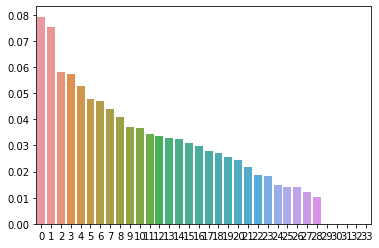

In [ ]:
sns.barplot(x = np.arange(pca.n_components_),
            y = pca.explained_variance_ratio_)

In [ ]:
pd.DataFrame({'Component':np.arange(pca.n_components_),
              'Var':np.round(pca.explained_variance_ratio_,3),
              'Var Acum':np.cumsum(np.round(pca.explained_variance_ratio_,3))})

Component    Var  Var Acum
0           0  0.079     0.079
1           1  0.076     0.155
2           2  0.058     0.213
3           3  0.057     0.270
4           4  0.053     0.323
5           5  0.048     0.371
6           6  0.047     0.418
7           7  0.044     0.462
8           8  0.041     0.503
9           9  0.037     0.540
10         10  0.037     0.577
11         11  0.034     0.611
12         12  0.034     0.645
13         13  0.033     0.678
14         14  0.032     0.710
15         15  0.031     0.741
16         16  0.030     0.771
17         17  0.028     0.799
18         18  0.027     0.826
19         19  0.025     0.851
20         20  0.024     0.875
21         21  0.022     0.897
22         22  0.019     0.916
23         23  0.018     0.934
24         24  0.015     0.949
25         25  0.014     0.963
26         26  0.014     0.977
27         27  0.012     0.989
28         28  0.010     0.999
29         29  0.000     0.999
30         30  0.000     0.999
31         31  0.000     0.999
32         32  0.000     0.999
33         33  0.000     0.999

In [ ]:
px.scatter(x = X_train_pca[:,1],
           y = X_train_pca[:,2],
           color = y_train.astype("category"),
           opacity = 0.2,
           marginal_x = 'histogram',
           marginal_y ='histogram',
           height = 800,
           width = 800,
           template = "plotly_white")

Output hidden; open in https://colab.research.google.com to view.